In [408]:
import numpy as np
import pandas as pd
import pandas_datareader 
import math
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import acf
import scipy.stats as stats

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Question 1

## download data

Using pandas_datareader, download daily prices for symbols GS, SPY,
DIA, WMT, EURUSD = X and GBPUSD = X from yahoo finance,
using the ‘Adj Close’ price for your analysis. In particular, use the period
‘2018-01-01’-‘2018-12-31’.

In [516]:
tickers = ['GS', 'SPY', 'DIA', 'WMT', 'EURUSD=X', 'GBPUSD=X']
daily_prices = yf.download(tickers, start = '2018-01-01', end='2018-12-31')['Adj Close'].dropna()

[*********************100%%**********************]  6 of 6 completed


In [517]:
daily_prices.head(3)

,DIA,EURUSD=X,GBPUSD=X,GS,SPY,WMT
Date,,,,,,
2018-01-02,220.279739,1.201158,1.351132,225.773880,244.057770,88.952400
2018-01-03,221.105682,1.206345,1.359619,223.672180,245.601471,89.728310
2018-01-04,222.571213,1.201043,1.351132,226.798233,246.636612,89.809509


## a 

(a) Regress the daily log returns of GS on the daily log returns of all other
predictors using a simple OLS model (no need to add or remove predictors
for this exercise).

In [79]:
log_returns = (np.log(daily_prices) - np.log(daily_prices.shift(1))).dropna()
log_returns.head(3)

,DIA,EURUSD=X,GBPUSD=X,GS,SPY,WMT
Date,,,,,,
2018-01-03,0.003743,0.004309,0.006262,-0.009352,0.006305,0.008685
2018-01-04,0.006606,-0.004406,-0.006262,0.013879,0.004206,0.000905
2018-01-05,0.008424,0.004852,0.003072,-0.005113,0.006642,0.005910


In [77]:
y = log_returns['GS']
X = log_returns[['SPY', 'DIA', 'WMT', 'EURUSD=X', 'GBPUSD=X' ]]
X = sm.add_constant(X)
OLS = sm.OLS(y, X).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GS   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     81.23
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           7.20e-50
Time:                        09:38:58   Log-Likelihood:                 795.52
No. Observations:                 249   AIC:                            -1579.
Df Residuals:                     243   BIC:                            -1558.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0015      0.001     -2.296      0.023      -0.003      -0.000
SPY            0.0906      0.262      0.346      0.730      -0.426       0.607
DIA            1.1144      0.258      4.324      0.000       0.607       1.622
WMT           -0.1126      0.051     -2.208      0.028      -0.213      -0.012
EURUSD=X      -0.0545      0.194     -0.281      0.779      -0.437       0.328
GBPUSD=X       0.2358      0.170      1.386      0.167      -0.099       0.571
==============================================================================
Omnibus:                       26.613   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.637
Skew:                          -0.376   Prob(JB):                     6.89e-19
Kurtosis:                       5.738   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## b
Use a cross-validation method in order to assess the MSE of the model
for this OLS, using a 5-fold split to split data into training set and validation set.

In [575]:
from sklearn import preprocessing

norm = pd.DataFrame(preprocessing.normalize(log_returns))
norm

,0,1,2,3,4,5
0,0.225911,0.260135,0.377987,-0.564549,0.380607,0.524254
1,0.373170,-0.248855,-0.353711,0.783997,0.237576,0.051095
2,0.582507,0.335512,0.212413,-0.353601,0.459296,0.408671
3,-0.024449,-0.123768,0.080611,-0.695323,0.086857,0.697544
4,0.291947,-0.335477,-0.020401,0.506254,0.135881,-0.725981
...,...,...,...,...,...,...
244,-0.316702,0.100911,0.056735,-0.871673,-0.354425,-0.029446
245,-0.566845,-0.154034,-0.034432,-0.489339,-0.560241,-0.316942
246,0.497294,0.039246,0.032893,0.431578,0.516022,0.545470
247,0.448784,-0.192679,-0.127681,0.611448,0.309556,0.524854


In [590]:
# normalize data (assuming normal distributions)
log_returns_norm = (log_returns - log_returns.mean()) / log_returns.std()
log_returns_norm.head(3)

,DIA,EURUSD=X,GBPUSD=X,GS,SPY,WMT
Date,,,,,,
2018-01-03,0.348397,0.965591,1.219666,-0.468095,0.608337,0.582369
2018-01-04,0.600786,-0.900949,-1.120359,0.962712,0.413556,0.071130
2018-01-05,0.760955,1.081767,0.623603,-0.207022,0.639579,0.400023


In [584]:
# split data into training and testing set
X = log_returns_norm[['SPY', 'DIA', 'WMT', 'EURUSD=X', 'GBPUSD=X' ]]; y = log_returns_norm['GS']

# create regression (using sklearn)
scores = -cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
OLS_MSE = np.mean(scores)
print(OLS_MSE)

0.3949255198374835


In [585]:
np.round(OLS.params, 4)

const      -0.0015
SPY         0.0906
DIA         1.1144
WMT        -0.1126
EURUSD=X   -0.0545
GBPUSD=X    0.2358
dtype: float64

## c 
Next run a series of cross-validations (using 5-fold split) in order to
choose the best lambda hyperparameter for a LASSO regression. Use the
MSE of the validation data for each lambda as your criteria. Hints: a)
remember to set the model to be normalized and b) try lambda parameters
using lam=np.logspace (−8, −4, 20).

In [588]:
# declare lambdas
lam = np.logspace(-15, -1.5, 100)

MSE_lasso = np.zeros(len(lam))
count = 0 

for lamb in lam: 
    lasso = linear_model.Lasso(alpha=lamb)
    scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')
    MSE_lasso[count] = -scores.mean()
    count += 1

Text(0.5, 1.0, 'Lasso regression MSE of different lambda')

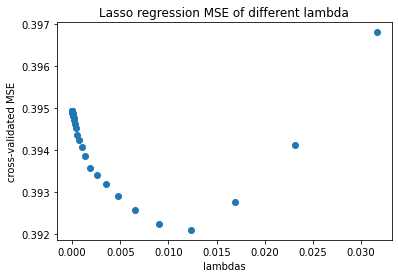

In [589]:
# plot lambda values vs MSE
plt.scatter(lam, MSE_lasso)
plt.xlabel('lambdas'); plt.ylabel('cross-validated MSE')
plt.title('Lasso regression MSE of different lambda')

## d 
Similarly, repeat the cross-validation exercise to select the best hyperparameter lambda for a Ridge regression. Hints: a) remember to set
the model to be normalized and b) try lambda parameters using lam =
np.linspace (0.0005, 0.05, 20)

In [558]:
lam_ridge = np.linspace(0, 8, 20)

MSE_ridge = np.zeros(len(lam_ridge))
count = 0 

for lamb in lam_ridge: 
    ridge = linear_model.Ridge(alpha=lamb)
    scores = -cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')
    MSE_ridge[count] = scores.mean()
    count += 1

Text(0.5, 1.0, 'Ridge regression MSE of different lambda')

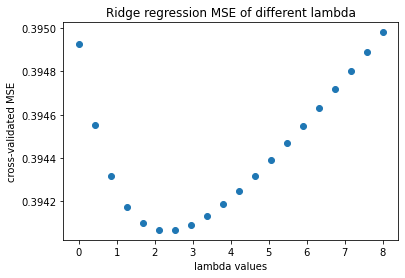

In [559]:
# plot lambda values vs MSE
plt.scatter(lam_ridge, MSE_ridge)
plt.xlabel('lambda values'); plt.ylabel('cross-validated MSE')
plt.title('Ridge regression MSE of different lambda')

## e 
Using the results from c) and d), what is the validation MSE for the
optimal LASSO model? What about for the optimal Ridge model?

In [542]:
validation_MSE_lasso = min(MSE_lasso)
validation_MSE_ridge = min(MSE_ridge)

print('Validation MSE for Lasso and Ridge respectively:', round(validation_MSE_lasso, 4), 
      round(validation_MSE_ridge, 4))

Validation MSE for Lasso and Ridge respectively: 0.3921 0.3941


## f
What are the coefficients of the optimal LASSO model? Has any of
the parameters shrunk to zero?

In [552]:
opt_lasso_coef = linear_model.Lasso(alpha=lam[np.argmin(MSE_lasso)]).fit(X, y).coef_
opt_ridge_coef = linear_model.Ridge(alpha=lam_ridge[np.argmin(MSE_ridge)]).fit(X, y).coef_

print('Coefficients for Lasso and Ridge respectively: \n', opt_lasso_coef, '\n', 
      opt_ridge_coef)

Coefficients for Lasso and Ridge respectively: 
 [ 0.07478617  0.73630511 -0.0753093   0.          0.05251085] 
 [ 0.1479489   0.68235983 -0.09577922 -0.0127027   0.07481433]


# Question 2

Using the quarterly data, investigate the possible autoregressive structure
of the growth in productivity. Using the data provided, what predictions
for the increase in productivity does it estimate for 2019-20? (use data
from Q1 1997 to Q2 2018 as in the CSV file). How has productivity been
changing over the long-term?

In [193]:
mfp = (
    pd.read_csv('data/mfp.csv')
    .dropna()
    .set_index('Time')
)

mfp.head()

,MFP
Time,
1994 Q1,78.566732
1994 Q2,79.312031
1994 Q3,79.335645
1994 Q4,80.016019
1995 Q1,78.650787


<AxesSubplot:xlabel='Time'>

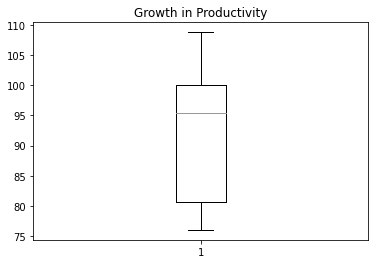

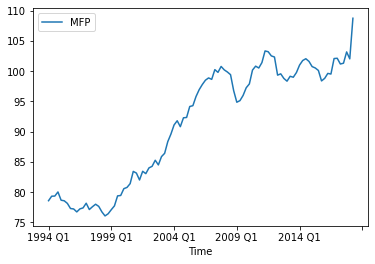

In [567]:
# plot data and check for outliers
plt.boxplot(mfp['MFP'])
plt.title('Growth in Productivity')

mfp.plot()

## Check Stationarity of Data

### ACF and PCAF

Text(0.5, 0, 'lags')

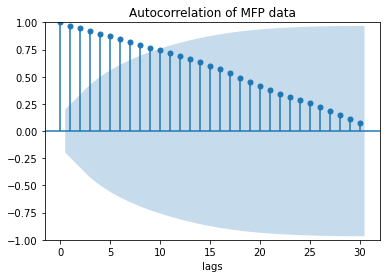

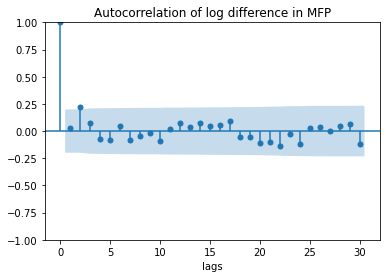

In [566]:
plot_acf(mfp, lags = 30)
plt.title('Autocorrelation of MFP data')
plt.xlabel('lags')

# transform series to create stationarity 
mfp_log_diff = (np.log(mfp) - np.log(mfp.shift(1))).dropna()

plot_acf(mfp_log_diff, lags = 30)
plt.title('Autocorrelation of log difference in MFP')
plt.xlabel('lags')

## Fit AR(p) model

In [247]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import arma_order_select_ic

# find p for AR(p)
best_p = arma_order_select_ic(mfp_log_diff.values, max_ar = 6, max_ma = 0, ic = ['aic', 'bic'])
print('best p for AR(p) = ', best_p.aic_min_order[0])

# run autoregressive model
AR1 = ARIMA(mfp_log_diff.values, order = (best_p.aic_min_order[0],0,0)).fit()
AR1.summary()

best p for AR(p) =  2


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   97
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 303.136
Date:                Sun, 19 Nov 2023   AIC                           -598.272
Time:                        18:06:52   BIC                           -587.973
Sample:                             0   HQIC                          -594.107
                                 - 97                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.002      1.632      0.103      -0.001       0.006
ar.L1          0.0992      0.119      0.830      0.406      -0.135       0.333
ar.L2          0.1919      0.105      1.824      0.068      -0.014       0.398
sigma2         0.0001   1.73e-05      6.533      0.000     7.9e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.50
Prob(Q):                              0.92   Prob(JB):                         0.47
Heteroskedasticity (H):               1.19   Skew:                            -0.30
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Check Residual Characteristics of our model

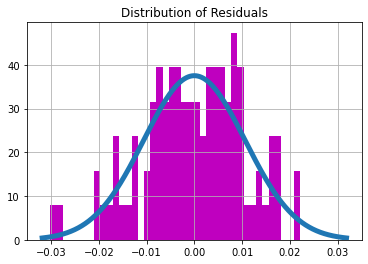

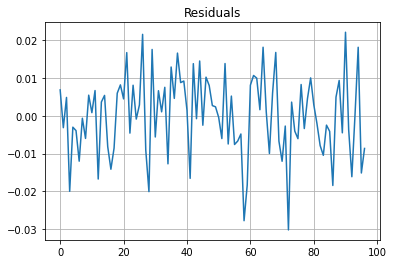

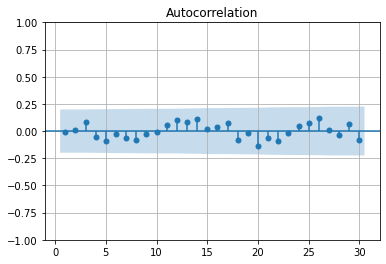

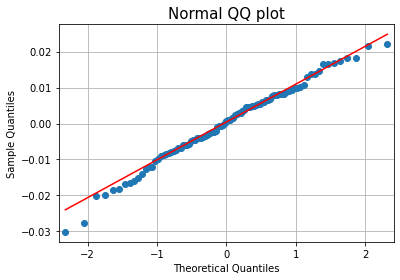

In [248]:
#Returning to AR(1) fitted model and checking for Residual characteristics

resid = AR1.resid #residuals
# check if approximately normal 
plt.hist(resid, bins =40,color='m', density = True)
plt.title('Distribution of Residuals')
mu = resid.mean()
sigma = resid.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 2419)
plt.plot(x, stats.norm.pdf(x, mu, sigma), linewidth= 5)
plt.grid(); plt.show(); plt.title('Residuals')
# plot residuals 
plt.plot(resid)
plt.grid()
#plot acf of residuals
plot_acf(resid,lags=30,zero=False)
plt.grid()
# And not quite normal
fig = sm.qqplot(resid, line='q')
plt.title('Normal QQ plot', fontsize=15)
plt.grid()

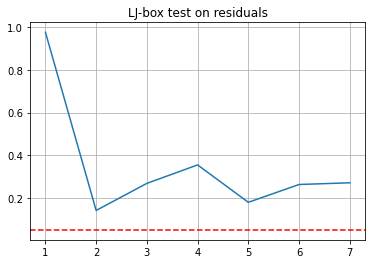

1    0.976391
2    0.141204
3    0.268122
4    0.354594
5    0.179395
6    0.262829
7    0.270911
Name: lb_pvalue, dtype: float64

In [568]:
# Check if autocorrelations of residuals is zero
lags = math.floor(np.log(len(resid)))
ljbox_test_res_AR1 = sm.stats.acorr_ljungbox(resid,lags)
plt.plot(ljbox_test_res_AR1['lb_pvalue'])
plt.axhline(y=0.05, color='r',ls='--')
plt.title('LJ-box test on residuals')
plt.grid(); plt.show()
ljbox_test_res_AR1['lb_pvalue']

Text(0.5, 1.0, 'Predicted log_diff for 2018-2019-2020')

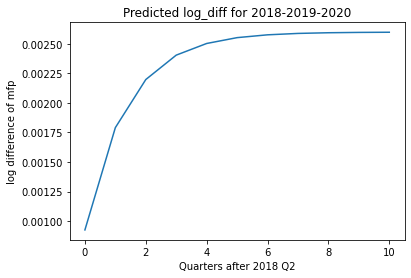

In [266]:
# predict changes over 2019 and 2020 (keep in mind this is COVID)
Start = len(mfp)
future_values = AR1.predict(start = Start, end = Start + 10)

plt.plot(future_values)
plt.xlabel('Quarters after 2018 Q2'); plt.ylabel('log difference of mfp')
plt.title('Predicted log_diff for 2018-2019-2020')

In [323]:
predictions = AR1.predict(start = Start, end = Start + 10, dynamic=False)

pred_prices = pd.DataFrame({'Time': ['2018 Q2', '2018 Q3', '2018 Q4', '2019 Q1','2019 Q2','2019 Q3','2019 Q4',
                                    '2020 Q1','2020 Q2','2020 Q3','2020 Q4'],
                   'MFP': np.zeros(11)})
pred_prices = pred_prices.set_index('Time')

pred_prices.loc['2018 Q2'] = mfp.loc['2018 Q2']

for i in range(1, 11):
    pred_prices.iloc[i] = math.exp(predictions[i]) * pred_prices.iloc[i-1]


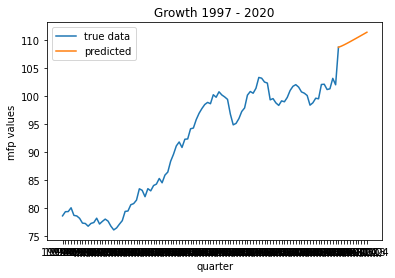

In [570]:
plt.plot(mfp, label = 'true data')
plt.plot(pred_prices, label = 'predicted')
plt.xlabel('quarter'); plt.ylabel('mfp values')
plt.legend(); plt.title('Growth 1997 - 2020')
plt.show()

## Refit model over 1997 - 2007 and 2008 - 2018 and test differences

By re-fitting your model over the periods 1997-2007 and 2008-2018, discuss
what apparent changes have been seen in productivity growth following
the 2008 financial crisis. Are these changes significant (both economically
and statistically)? How does this change your predictions of productivity
growth?

In [355]:
pre_crisis = mfp_log_diff.loc['1997 Q1':'2007 Q4']
post_crisis = mfp_log_diff.loc['2008 Q1':'2018 Q2']

# run autoregressive model
pre_AR = ARIMA(pre_crisis.values, order = (1,0,0)).fit()
post_AR = ARIMA(post_crisis.values, order = (1,0,0)).fit()
pre_AR.summary()

/Users/jelmerbennema/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   44
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 140.986
Date:                Sun, 19 Nov 2023   AIC                           -275.971
Time:                        21:18:02   BIC                           -270.619
Sample:                             0   HQIC                          -273.986
                                 - 44                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.001      4.415      0.000       0.003       0.009
ar.L1         -0.1571      0.180     -0.873      0.382      -0.510       0.195
sigma2       9.63e-05   2.63e-05      3.667      0.000    4.48e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.46
Prob(Q):                              0.84   Prob(JB):                         0.48
Heteroskedasticity (H):               0.61   Skew:                            -0.39
Prob(H) (two-sided):                  0.34   Kurtosis:                         2.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [356]:
post_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   42
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 129.027
Date:                Sun, 19 Nov 2023   AIC                           -252.054
Time:                        21:18:31   BIC                           -246.841
Sample:                             0   HQIC                          -250.144
                                 - 42                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.002      0.047      0.963      -0.004       0.005
ar.L1          0.2414      0.189      1.277      0.201      -0.129       0.612
sigma2         0.0001   2.55e-05      4.908      0.000    7.53e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.73
Prob(Q):                              0.99   Prob(JB):                         0.70
Heteroskedasticity (H):               0.91   Skew:                            -0.22
Prob(H) (two-sided):                  0.86   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Check if changes are significant

In [378]:
from scipy.stats import t

s1 = pre_AR.cov_params()[1,1]; s2 = post_AR.cov_params()[1,1]
d1 = len(pre_crisis) - 2; d2 = len(post_crisis) - 2

t_value = (pre_AR.params[1] - post_AR.params[1]) / math.sqrt(s1 + s2)

# Use Welch Satterhwaite approximation to find df
degrees_of_freedom = (s1 + s2)**2 / (s1**2/d1 + s2**2/d2)

In [380]:
# Calculate the p-value
p_value = 2 * (1 - t.cdf(abs(t_value), df=degrees_of_freedom))
p_value

0.13054868371808692

# Question 3

 Using pandas_datareader, get daily volume traded data from GOOG for
the period ‘2012-01-04’- ‘2019-11-04’. Verify for the presence of unit roots
and proceed to address them. Testing for stationarity, choose the appropriate ARMA model, providing appropriate model diagnostics

In [387]:
tickers = ['GOOG']
GOOG_volume = yf.download(tickers, start = '2012-01-04', end='2019-11-04')['Volume'].dropna()
GOOG_volume.head()

[*********************100%%**********************]  1 of 1 completed


Date
2012-01-04    114989399
2012-01-05    131808205
2012-01-06    108119746
2012-01-09    233776981
2012-01-10    176483032
Name: Volume, dtype: int64

Text(0.5, 1.0, 'GOOG daily traded volume')

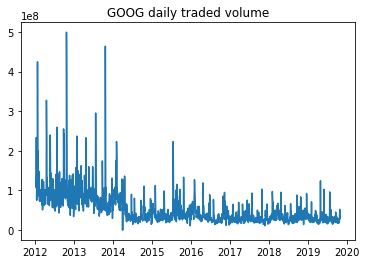

In [395]:
plt.plot(GOOG_volume)
plt.title('GOOG daily traded volume')

In [391]:
# verify presence of unit roots
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

test = adfuller(GOOG_volume)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[4].items():
    print('\t%s: %.2f' % (item, value))

ADF Statistic: -3.290086
p-value: 0.015328
Critical Values:
	1%: -3.43
	5%: -2.86
	10%: -2.57


In [393]:
# Test stationarity:

test = kpss(GOOG_volume)
print('KPSS Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[3].items():
    print('\t%s: %.2f' % (item, value))

KPSS Statistic: 5.284009
p-value: 0.010000
Critical Values:
	10%: 0.35
	5%: 0.46
	2.5%: 0.57
	1%: 0.74


/Users/jelmerbennema/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


passes some of these tests but data is heteroskedastic... so have to fix that. 

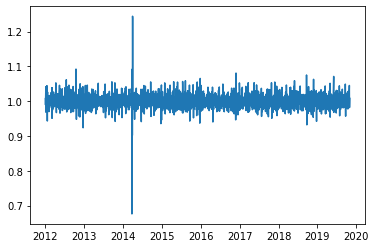

In [405]:
# Try log differencing data to make stationary
GOOG_volume_ld = (np.log(GOOG_volume) / np.log(GOOG_volume.shift(1))).dropna()
plt.plot(GOOG_volume_ld)

Text(0.5, 1.0, 'Autocorrelation of log difference GOOG volume')

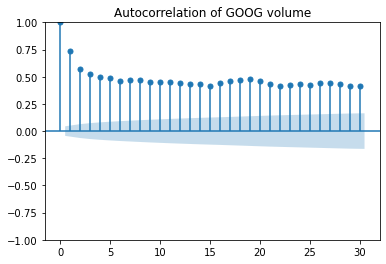

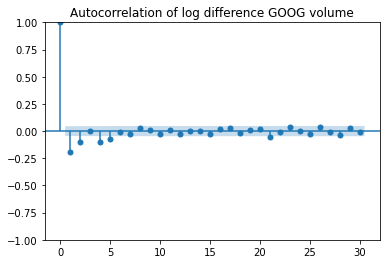

In [413]:
plot_acf(GOOG_volume, lags = 30)
plt.title('Autocorrelation of GOOG volume')

plot_acf(GOOG_volume_ld, lags = 30)
plt.title('Autocorrelation of log difference GOOG volume')

In [406]:
# Run adfuller test again: log difference of data set is stationary
test = adfuller(GOOG_volume_ld)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[4].items():
    print('\t%s: %.2f' % (item, value))

ADF Statistic: -14.183259
p-value: 0.000000
Critical Values:
	1%: -3.43
	5%: -2.86
	10%: -2.57


In [410]:
# find p for AR(p)
best_p = arma_order_select_ic(GOOG_volume_ld.values, max_ar = 6, max_ma = 6, ic = ['aic', 'bic'])
print('best p for ARMA(p, q) = ', best_p.aic_min_order[0])

# run autoregressive model
GOOG_ARMA = ARIMA(GOOG_volume_ld.values, order = (best_p.aic_min_order[0],0,best_p.aic_min_order[1])).fit()
GOOG_ARMA.summary()

best p for ARMA(p, q) =  1


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1970
Model:                 ARIMA(1, 1, 6)   Log Likelihood                4824.466
Date:                Sun, 19 Nov 2023   AIC                          -9632.933
Time:                        22:18:52   BIC                          -9588.251
Sample:                             0   HQIC                         -9616.514
                               - 1970                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9876      0.008   -128.225      0.000      -1.003      -0.972
ma.L1         -0.3590      0.015    -24.102      0.000      -0.388      -0.330
ma.L2         -1.2047      0.014    -88.245      0.000      -1.231      -1.178
ma.L3          0.2531      0.019     13.633      0.000       0.217       0.290
ma.L4          0.0107      0.016      0.656      0.512      -0.021       0.042
ma.L5          0.1000      0.012      8.568      0.000       0.077       0.123
ma.L6          0.2003      0.014     14.537      0.000       0.173       0.227
sigma2         0.0004   4.03e-06    104.801      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.80   Jarque-Bera (JB):            113708.25
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            -0.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Check residual characteristics of our model

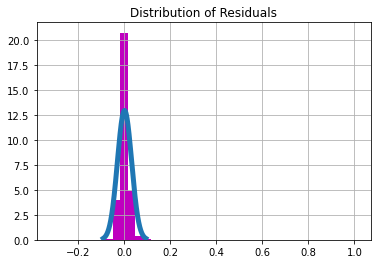

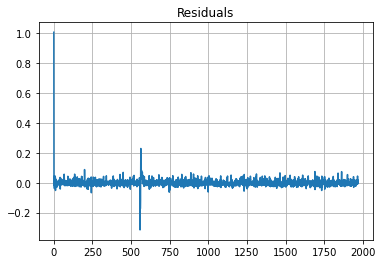

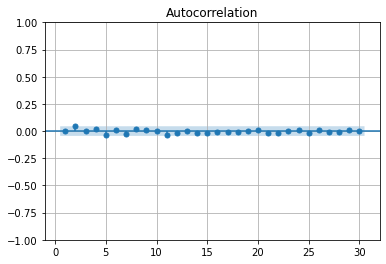

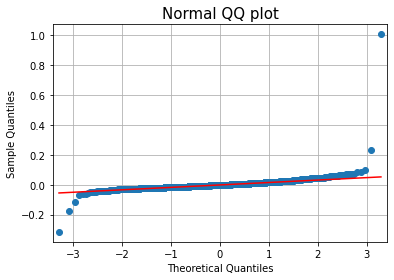

In [415]:
#Returning to ARMA model and checking for Residual characteristics

resid = GOOG_ARMA.resid #residuals
# check if approximately normal 
plt.hist(resid, bins =40,color='m', density = True)
plt.title('Distribution of Residuals')
mu = resid.mean()
sigma = resid.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 2419)
plt.plot(x, stats.norm.pdf(x, mu, sigma), linewidth= 5)
plt.grid(); plt.show(); plt.title('Residuals')
# plot residuals 
plt.plot(resid)
plt.grid()
#plot acf of residuals
plot_acf(resid,lags=30,zero=False)
plt.grid()
# And not quite normal
fig = sm.qqplot(resid, line='q')
plt.title('Normal QQ plot', fontsize=15)
plt.grid()